# Exploring my Yu-Gi-Oh! Collection

EDA to explore my card collection and find interesting facts/statistics about my collection

In [150]:
#Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import os
import glob
import itertools
from collections import OrderedDict
from PIL import Image
from wordcloud import WordCloud, ImageColorGenerator
import ipywidgets as widgets

My database contains information about each card that I have in my collection, such as "Name", "Attribute", "Type" and more...

Let's explore all the columns below

In [2]:
#load data

ygo = pd.read_excel(".\data\Ygo!.xlsx", sheet_name=['Binders', 'Misc - Structure Decks', 'Misc', 'Commons-Rares Binder'])
sell_ygo = pd.read_excel(".\data\Sell_Ygo!.xlsx", sheet_name=['For Sale-Trade'])

#assign each sheet to a unique dataframe
binder_df = ygo["Binders"]
sdecks_df = ygo["Misc - Structure Decks"]
misc_df = ygo["Misc"]
commRares_df = ygo["Commons-Rares Binder"]

sell_df = sell_ygo["For Sale-Trade"]

main_df_list = ["binder_df", "sdecks_df", "misc_df", "commRares_df"] #list of all df names (Excluding the sell df as i do not want to mix those in with the main collection)
all_main_dfs = pd.concat([binder_df, sdecks_df, misc_df, commRares_df], join = "inner") #new df that is a concatenation of all the rest (Excluding the sell df as i do not want to mix those in with the main collection)

In [3]:
#explore the columns of each df
for sheet in ygo:
    print(f"The columns of {sheet} df are: \n {ygo[sheet].columns}, total: {len(ygo[sheet].columns)} \n")
    
for sheet in sell_ygo:
    print(f"The columns of {sheet} df are: \n {sell_ygo[sheet].columns}, total: {len(sell_ygo[sheet].columns)} \n")

The columns of Binders df are: 
 Index(['Name', 'Attribute', 'Type',
       'Card_Type (Normal/Effect/Ritual/Fusion/Synchro/XYZ/Pendulum/Link)',
       'ATK', 'DEF', 'Rarity', 'Count', 'Link', 'Level/Rank', 'Pendulum Scale',
       'Set', 'Comments', 'Tuner/Flip/Gemini/Toon', 'Price £', 'EDITION',
       'Binder', 'Binder2'],
      dtype='object'), total: 18 

The columns of Misc - Structure Decks df are: 
 Index(['Name', 'Attribute', 'Type', 'Card_Type', 'ATK', 'DEF', 'Rarity',
       'Count', 'Link', 'Level/Rank', 'Pendulum Scale', 'Set', 'Comments',
       'Tuner/Flip/Gemini', 'Price £', 'EDITION'],
      dtype='object'), total: 16 

The columns of Misc df are: 
 Index(['Name', 'Attribute', 'Type', 'Card_Type', 'ATK', 'DEF', 'Rarity',
       'Count', 'Link', 'Level/Rank', 'Pendulum Scale', 'Set', 'Comments',
       'Tuner/Flip/Gemini/Spirit', 'Price £', 'EDITION'],
      dtype='object'), total: 16 

The columns of Commons-Rares Binder df are: 
 Index(['Name', 'Attribute', 'Type', 'C

In [158]:
print(binder_df.describe())

                 Name Rarity   Set      EDITION
count             719    719   590          527
unique            647     15   162            7
top     Dark Magician  Ultra  RA02  1ST EDITION
freq                7    378    29          372


In [170]:
def df_desc(df = "all_main_dfs"):
    
    if df == "all_main_dfs":
        print(all_main_dfs.describe())
    if df == "binder_df":
        print(binder_df.describe())
    if df == "sdecks_df":
        print(sdecks_df.describe())
    if df == "misc_df":
        print(misc_df.describe())
    if df == "commRares_df":
        print(commRares_df.describe())
    if df == "sell_df":
        print(sell_df.describe())

In [171]:
radio_buttons = widgets.RadioButtons(
    options = ["binder_df", "sdecks_df", "misc_df", "commRares_df", "sell_df", "all_main_dfs"],
    value = "all_main_dfs"
)

In [172]:
widgets.interact(df_desc, df = radio_buttons)
#widgets.interact(df_desc, df = [binder_df, sdecks_df, misc_df, commRares_df, sell_df, all_main_dfs])

interactive(children=(RadioButtons(description='df', index=5, options=('binder_df', 'sdecks_df', 'misc_df', 'c…

<function __main__.df_desc(df='all_main_dfs')>

In [4]:
cols = ["Name","Rarity","Set","EDITION"] #for now we will focus on these 4 columns

binder_df = ygo["Binders"].loc[:, cols]
sdecks_df = ygo["Misc - Structure Decks"].loc[:, cols]
misc_df = ygo["Misc"].loc[:, cols]
commRares_df = ygo["Commons-Rares Binder"].loc[:, cols]

sell_df = sell_ygo["For Sale-Trade"].loc[:, cols]

In [5]:
#Explore size of each df

print("The size of the binder df is:", binder_df.shape)
print("The size of the structure decks df is:", sdecks_df.shape)
print("The size of the misc df is:", misc_df.shape)
print("The size of the commRares df is:", commRares_df.shape)

print("The size of the sell df is:", sell_df.shape)

The size of the binder df is: (719, 4)
The size of the structure decks df is: (19, 4)
The size of the misc df is: (192, 4)
The size of the commRares df is: (39, 4)
The size of the sell df is: (158, 4)


In [6]:
#lets check for null/empty fields

print(f"Out of {len(binder_df)} rows, the Binder df has this many empty fields:\n", binder_df.isnull().sum(), "\n")
print(f"Out of {len(sdecks_df)} rows, the Misc - Structure Decks df has this many empty fields:\n", binder_df.isnull().sum(),"\n")
print(f"Out of {len(misc_df)} rows, the Misc df has this many empty fields:\n", binder_df.isnull().sum(),"\n")
print(f"Out of {len(commRares_df)} rows, the Commons-Rares df has this many empty fields:\n", binder_df.isnull().sum(),"\n")

print(f"Out of {len(sell_df)} rows, the For Sale-Trade df has this many empty fields:\n", binder_df.isnull().sum(),"\n")

Out of 719 rows, the Binder df has this many empty fields:
 Name         0
Rarity       0
Set        129
EDITION    192
dtype: int64 

Out of 19 rows, the Misc - Structure Decks df has this many empty fields:
 Name         0
Rarity       0
Set        129
EDITION    192
dtype: int64 

Out of 192 rows, the Misc df has this many empty fields:
 Name         0
Rarity       0
Set        129
EDITION    192
dtype: int64 

Out of 39 rows, the Commons-Rares df has this many empty fields:
 Name         0
Rarity       0
Set        129
EDITION    192
dtype: int64 

Out of 158 rows, the For Sale-Trade df has this many empty fields:
 Name         0
Rarity       0
Set        129
EDITION    192
dtype: int64 



The above information makes sense, as "Name" is essential in order to recognise the card, and "Rarity" is important in knowing the how "rare" the card is (Super Rare, Ultra Rare, Secret Rare, etc...). Set (a code that indicates the set of origin of the card) and EDITION are also important in order to identify the version of the card that i own i.e, from which set did it come, and was it from the first printing of that set or a reprinted version. These information are important if we want to determine the version and/or value of the card. A card may be printed in multiple sets, and a set is considered 1st edition the first time it is printed, but may be reprinted at a future time as an "Unlimited edition". This unlimited edition prints tend to be of lower value. 

## Visualisations/Graphs

Let's explore more with the help of some graphs/visualisations techniques

In [51]:
# #Let's collect all the set codes in our data, and create a fun wordcloud to display them
# #first let's gather all unique set codes from our various df
# set_codes = []

# for sheet in ygo:
#     #print(ygo[sheet]["Set"].unique()) #see all options available for the "EDITION" attribute
#     #print(type(ygo[sheet]["Set"].unique()))
#     set_codes.append(ygo[sheet]["Set"].unique())
#     #print(set_codes)
    
# #print(set_codes)
# flat_set_codes = [x for xs in set_codes for x in xs]
# list_set_codes = set(flat_set_codes)

# print(list_set_codes) #now we have a list of all unique set_codes
# print(len(list_set_codes))


# #print(flat_set_codes)
# #print(len(flat_set_codes))
# #print(len(set(flat_set_codes)))

In [8]:
# #Let's collect all the set codes in our data, and create a fun wordcloud to display them
# #first let's gather all unique set codes from our various df
# set_codes = "" #initial empty string. we will add all codes (as strings) to this. It will help us create the wordcloud

# for sheet in ygo:
#     #print(ygo[sheet]["Set"])
#     #print(type(ygo[sheet]["Set"]))
#     #print(len(ygo[sheet]["Set"]))
#     temp = ygo[sheet]["Set"].str.cat(sep=',') #turn the array of set_codes into a long string
#     set_codes += temp #and add it to the initial string
#     #print(set_codes)
    
# print(set_codes)
# #print(type(set_codes))
# print("\n")

# #there is a minor inconvenience. Some sets (e.g., "LOB (25th anniversary)" contain spaces in them, which may cause an error when creating the wordcloud as it will split words on whitespaces)
# #to tackle this, replace all occurances of ' ' with a  '-'
# set_codes = set_codes.replace(' ', '-')
# print(set_codes)
# print("\n")

# #and then turn ',' to ' ' to distinguish between set codes
# set_codes = set_codes.replace(',', ' ')
# print(set_codes)

In [127]:
#Create a dictionary of each set code in our database and how many times it appears

set_dict = all_main_dfs["Set"].value_counts()
#print(set_dict)
#print(type(set_dict))

set_dict = set_dict.to_dict()
print(set_dict)
print(len(set_dict))

{'BLMR': 54, 'MP22': 53, 'RA02': 53, 'MP23': 35, 'HAC1': 34, 'BLCR': 28, 'BLC1': 26, 'MP21': 22, 'GFP2': 22, 'YGLD': 21, 'BLTR': 17, 'LEDD': 15, 'LDK2': 15, 'MAZE': 13, 'KICO': 12, 'RA01': 12, 'DUPO': 12, 'LOB (25th anniversary)': 11, 'DRL3': 9, 'PHHY': 8, 'SR14': 8, 'INFO': 8, 'LC01 (25th anniversary)': 8, 'MP15': 8, 'LODT': 7, 'SDCK': 6, 'MZMI': 6, 'WSUP': 6, 'TDIL': 6, 'LC02': 6, 'MP16': 6, 'DUDE': 6, 'LC01': 6, 'SDCS': 6, 'DUNE': 6, 'SHVI': 6, 'LCGX': 5, 'CYAC': 5, 'SDPL': 5, 'PEVO': 5, 'TN23': 5, 'IOC (25th anniversary)': 5, 'PHNI': 5, 'GFTP': 5, 'LDS2': 5, 'LART': 4, 'BACH': 4, 'DPRP': 4, 'SDFC': 4, 'BROL': 4, 'CT13': 4, 'SDWS': 3, 'CT15': 3, 'WISU': 3, 'LDS3': 3, 'DABL': 3, 'ANPR': 3, 'YS15': 3, 'BLVO': 3, 'DESO': 3, 'MAMA': 3, 'SDRR': 3, 'CT08': 3, 'BOSH': 3, 'EG01': 3, 'MIL1': 3, 'LC04': 3, 'LD10': 3, 'DUOV': 3, 'SDPD': 3, 'YMP1': 3, 'BLLR': 3, 'EP1': 3, 'SDBE': 2, 'CT12': 2, 'SKE': 2, 'PGL3': 2, 'SDMY': 2, 'SDKS': 2, 'CT07': 2, 'SDMP': 2, 'SDHS': 2, 'LOD': 2, 'SR02': 2, 'CYHO

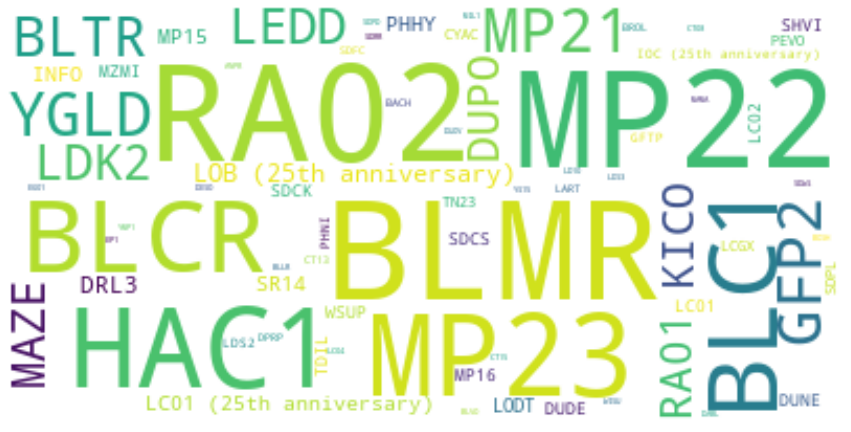

In [50]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000,
               contour_width=2, contour_color='firebrick')

# Generate a wordcloud
wc.generate_from_frequencies(set_dict)

#show
plt.figure(figsize=[15,15])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()

In [36]:
mask = np.array(Image.open("data/CyberEndDragon2.jpg"))

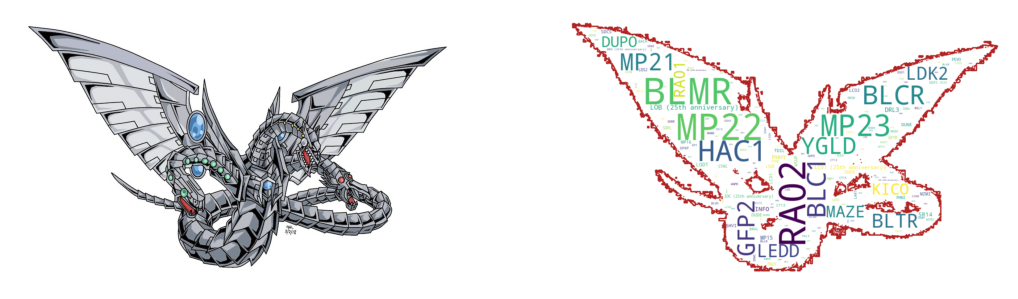

In [47]:
# Create a word cloud image
wc = WordCloud(background_color="white", max_words=1000, mask=mask,
               contour_width=2, contour_color='firebrick')

# Generate a wordcloud
wc.generate_from_frequencies(set_dict)

f, axarr = plt.subplots(1,2, figsize = (18,18))
axarr[0].imshow(Image.open("data/CyberEndDragon2.jpg"))
axarr[0].axis("off")
axarr[1].imshow(wc, interpolation='bilinear')
axarr[1].axis("off")
plt.show()

In [133]:
top_sets = dict(itertools.islice(set_dict.items(), 10))
low_sets = OrderedDict(reversed(list(set_dict.items())))
low_sets = dict(itertools.islice(low_sets.items(), 163))

#print(top_sets)
#print(low_sets)

top_bot_sets = {"Top 10 sets": sum(top_sets.values()), "Others": sum(low_sets.values())}

{'BLMR': 54, 'MP22': 53, 'RA02': 53, 'MP23': 35, 'HAC1': 34, 'BLCR': 28, 'BLC1': 26, 'MP21': 22, 'GFP2': 22, 'YGLD': 21}
{'SDCB': 1, 'CT09': 1, 'PP02': 1, 'CBLZ': 1, 'TOCH': 1, 'PHRA': 1, 'MADE': 1, 'LED7': 1, '5DS2': 1, 'GEIM': 1, 'DCR (25th anniversary)': 1, 'LEHD': 1, 'MRD': 1, 'RATE': 1, 'SD6': 1, 'PGLD': 1, 'FUEN': 1, 'WGRT': 1, 'LCYW': 1, 'MP18': 1, 'CT04': 1, 'FLOD': 1, 'MOV': 1, 'SRL (25th anniversary)': 1, 'SDDL': 1, 'LC06': 1, 'SD09': 1, 'SR10': 1, 'MP17': 1, 'OP20': 1, 'ZTIN': 1, 'SDCL': 1, 'LDS1': 1, 'INCH': 1, 'YS11': 1, 'PRC1': 1, 'NECH': 1, 'STOR': 1, 'RYMP': 1, 'TLM': 1, 'INOV': 1, 'DRL2': 1, 'SDSB': 1, 'YS18': 1, 'FIGA': 1, 'JOTL-ENDE': 1, 'HA04': 1, 'SD3': 1, 'BLRR': 1, 'SDOK': 1, 'SDD': 1, 'NKRT': 1, 'SHVA': 1, 'SPWA': 1, 'OP08': 1, 'SDSE': 1, 'SGX3': 1, 'YUCB': 1, 'LC03': 1, 'LEDE': 1, 'CORE': 1, 'PGL2': 1, 'LC5D': 1, 'DUSA': 1, 'SDP': 1, 'ABPF': 1, 'YS16': 1, 'HA02': 1, 'GAOV': 1, 'SDAZ': 1, 'MC1': 1, 'SDRL': 1, 'LIOV': 2, 'AMDE': 2, 'BLAR': 2, 'CT1': 2, 'SYE': 2, 

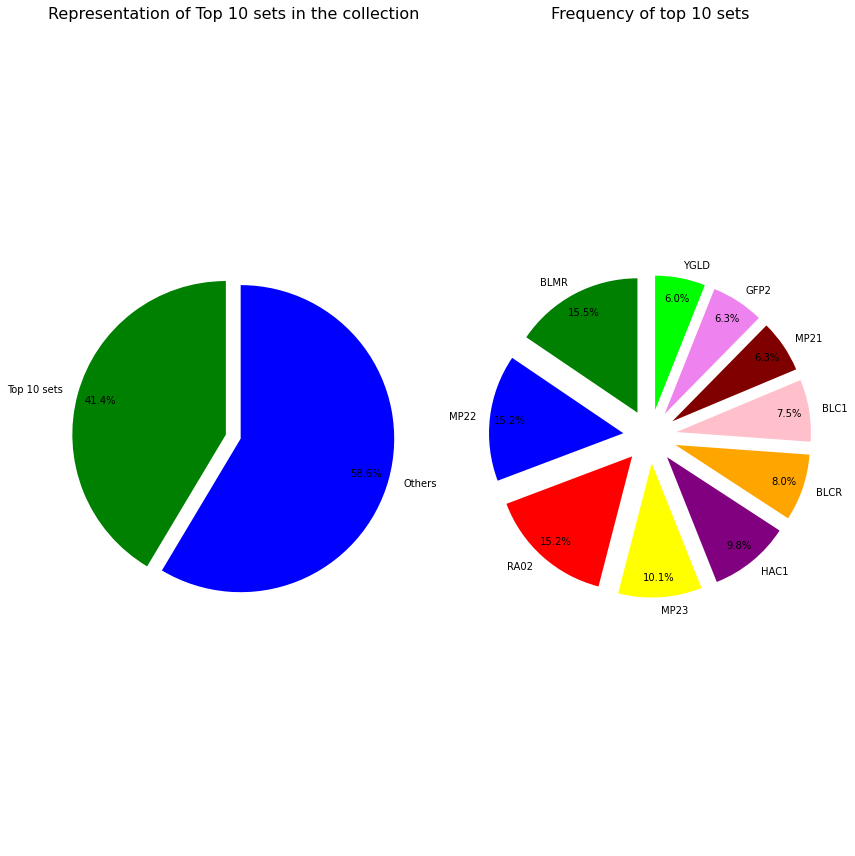

In [144]:
#colors
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']
colors = ["Green", "Blue", "Red", "Yellow", "Purple", "Orange", "Pink", "Maroon", "Violet", "Lime"]
#explosion
explode1 = [0.05] * len(top_bot_sets)
explode2 = [0.2] * len(top_sets)
 
fig1, ax1 = plt.subplots(1,2, figsize = (12,12))

#draw circle
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

ax1[0].pie(list(top_bot_sets.values()), colors = colors, labels=list(top_bot_sets.keys()), autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode1)
ax1[0].axis('equal')
ax1[0].set_title("Representation of Top 10 sets in the collection",fontsize=16)

ax1[1].pie(list(top_sets.values()), colors = colors, labels=list(top_sets.keys()), autopct='%1.1f%%', startangle=90, pctdistance=0.85, explode = explode2)
ax1[1].axis('equal')
ax1[1].set_title("Frequency of top 10 sets",fontsize=16)
plt.tight_layout()
plt.show()


In [52]:
#Lets see the difference between card "EDITIONS"
for sheet in ygo:
    print(ygo[sheet]["EDITION"].unique()) #see all options available for the "EDITION" attribute

[nan '1ST EDITION' 'LIMITED EDITION' 'UNLIMITED EDITION' '1st Edition'
 'UNLIMITED' '1st EDITION' 'UNPLAYABLE']
[nan '1st Edition']
[nan '1st Edition' 'LIMITED EDITION' 'Unlimited Edition']
[nan '1st Edition']


In [69]:
Total_cards = [len(ygo[x]) for x in ygo]
print(f"Total_cards for each df is {Total_cards}")

FirstEd_cards = [len(ygo[x][(ygo[x]["EDITION"] == '1ST EDITION') | (ygo[x]["EDITION"] == '1st Edition') | (ygo[x]["EDITION"] == '1st EDITION')]) for x in ygo]
print(f"First Edition cards in each df is {FirstEd_cards}")

UnlimitedEd_cards = [len(ygo[x][(ygo[x]["EDITION"] == 'UNLIMITED') | (ygo[x]["EDITION"] == 'UNLIMITED EDITION') | (ygo[x]["EDITION"] == 'Unlimited Edition')]) for x in ygo]
print(f"Unlimited Edition cards in each df is {UnlimitedEd_cards}")

LimitedEd_cards = [len(ygo[x][(ygo[x]["EDITION"] == 'LIMITED') | (ygo[x]["EDITION"] == 'LIMITED EDITION') | (ygo[x]["EDITION"] == 'Limited Edition')]) for x in ygo]
print(f"Limited Edition cards in each df is {LimitedEd_cards}")

Total_cards for each df is [719, 19, 192, 39]
First Edition cards in each df is [376, 9, 140, 9]
Unlimited Edition cards in each df is [63, 0, 9, 0]
Limited Edition cards in each df is [87, 0, 6, 0]


In [146]:
myLabels = ["Binders", "Misc - Structure Decks", "Misc", "Commons-Rares Binders"]
explode = [0.2, 0.1, 0.1, 0.1]

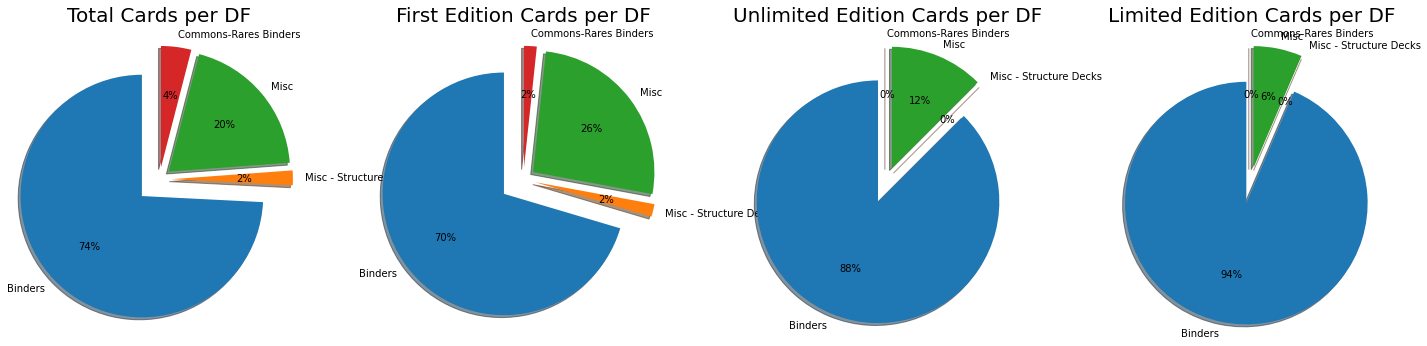

In [147]:
f, ax = plt.subplots(1, 4, figsize = (25,25))

ax[0].pie(Total_cards, labels = myLabels, autopct=lambda p: '{:.0f}%'.format(p),
                    startangle=90, shadow = True, explode = explode)
ax[0].set_title("Total Cards per DF", fontsize=20)
ax[0].axis("off")

ax[1].pie(FirstEd_cards, labels = myLabels, autopct=lambda p: '{:.0f}%'.format(p),
                    startangle=90, shadow = True, explode = explode)
ax[1].set_title("First Edition Cards per DF", fontsize=20)
ax[1].axis("off")

ax[2].pie(UnlimitedEd_cards, labels = myLabels, autopct=lambda p: '{:.0f}%'.format(p),
                    startangle=90, shadow = True, explode = explode)
ax[2].set_title("Unlimited Edition Cards per DF", fontsize=20)
ax[2].axis("off")

ax[3].pie(LimitedEd_cards, labels = myLabels, autopct=lambda p: '{:.0f}%'.format(p),
                    startangle=90, shadow = True, explode = explode)
ax[3].set_title("Limited Edition Cards per DF", fontsize=20)
ax[3].axis("off")

plt.show()